<a href="https://colab.research.google.com/github/pedromendesjr/projetosDS/blob/main/Projeto_de_Classifica%C3%A7%C3%A3o_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de detecção de doenças cardíacas *(Heart Disease)* através de Machine Learning:

### Pedro Lourenço Mendes Júnior - ds.pedromendes@gmail.com - [Acessar GitHub](github.com/pedromendesjr)

<img src='https://img.freepik.com/vetores-gratis/ilustracao-do-conceito-de-cardiologista_114360-6847.jpg?w=740&t=st=1687444617~exp=1687445217~hmac=564e0d5401d982c44da6a51f0eb9101fbd448b20a5ae2a61f689c63a53d1709a' alt = 'TESTE' width = '500' height = '500' title = "Image by rawpixel.com on Freepik">

No campo da saúde, a capacidade de prever e diagnosticar doenças de forma precisa desempenha um papel crucial no tratamento e na melhoria dos resultados para os pacientes. Com o avanço da tecnologia e o acesso a conjuntos de dados cada vez maiores, técnicas de Machine Learning têm se mostrado promissoras para auxiliar nesse processo. Neste projeto de estudos, utilizamos algoritmos de Decision Tree e Random Forest para prever casos de doença cardíaca, explorando técnicas de limpeza de dados, feature scaling, análise exploratória e validação cruzada.

A doença cardíaca é uma das principais causas de morbidade e mortalidade em todo o mundo. A capacidade de identificar corretamente os indivíduos com maior risco de desenvolver doença cardíaca pode ajudar na prevenção, no tratamento precoce e no acompanhamento adequado dos pacientes. Nesse contexto, o uso de técnicas de Machine Learning pode fornecer insights valiosos e contribuir para aprimorar os métodos tradicionais de diagnóstico.

Durante o projeto, aplicamos uma abordagem baseada em Decision Tree e Random Forest para realizar a classificação dos casos de doença cardíaca. A decisão de usar esses algoritmos foi baseada em suas características de robustez, adaptabilidade a conjuntos de dados complexos e capacidade de lidar com problemas de classificação.

Antes de treinar os modelos, conduzimos uma etapa crucial de limpeza e pré-processamento dos dados. Isso envolveu a remoção de valores ausentes, tratamento de outliers e normalização de características por meio do feature scaling. Essas etapas foram fundamentais para garantir a integridade e a qualidade dos dados, permitindo que os modelos aprendessem padrões relevantes de forma mais eficaz.

Além disso, realizamos uma análise exploratória dos dados para obter insights sobre as características mais relevantes para a previsão de doenças cardíacas. Essa análise nos ajudou a compreender melhor a natureza dos dados e a identificar possíveis relacionamentos e padrões que poderiam ser explorados pelos modelos.Utilizamos a validação cruzada para ajustar os hiperparâmetros dos modelos Decision Tree e Random Forest, garantindo uma avaliação mais precisa e confiável do desempenho dos mesmos.

Este projeto de estudos visa aprimorar nossas habilidades em Machine Learning e fornecer uma base sólida para o desenvolvimento de modelos de previsão de doenças cardíacas. Ao explorar técnicas de limpeza de dados, feature scaling, análise exploratória e validação cruzada, buscamos maximizar a precisão e a capacidade de generalização dos modelos, contribuindo assim para a área de saúde e bem-estar dos pacientes.

No restante deste relatório, detalharemos os passos realizados, discutiremos os resultados obtidos e exploraremos possíveis melhorias e direções futuras para expandir esse trabalho.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import matplotlib
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


# Conhecendo os Dados:

In [ ]:
print(f'O dataset possui {data.shape[0]} linhas e {data.shape[1]} colunas.')

O dataset possui 918 linhas e 12 colunas.


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Aparentemente, não temos grandes problemas com os tipos das variáveis.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


## Dicionário de Variáveis:

1. **Age:** Idade do paciente (em anos)
2. **Sex:** Sexo do Paciente (M: Masculino e F: Feminino)
3. **ChestPainType:** Tipo de dor no peito (TA: Angina típica, ATA: Angina atípica, NAP: Sem dor anginal, ASY: Assintomático)
4. **RestingBP:** Pressão Arterial em Repouso (mm Hg)
5. **Cholesterol:** Colesterol (mm Hg)
6. **FastingBS:** Nível de açucar no sangue em repouso (1: Se FastingBS > 120 e 0: caso contrário)
7. **RestingECG:** Resultado do Eletrocardiograma em repouso (Normal: Normal, ST: Elevação ou Depressão da onda ST, LVH: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)
8. **MaxHR:** Frequência cardíaca máxima registrada (Valor numérico)
9. **ExerciseAngina:** Angina induzida por exercício (Yes: Sim, No: Não)
10. **Oldpeak:** ST (Valor numérico medido na depressão)
11. **ST_Slope:** Inclinação do segmento ST (Up: para cima, Flat: constante, Down: para baixo)
12. **HeartDisease:** Variável alvo: (1: doença cardíaca, 0: sem doença cardíaca)

É importante analisarmos a existência de dados duplicados, bem como a ausência de valores:

In [ ]:
# Verificando a ausência:
data.isnull().sum().sum()

0

In [ ]:
# Verificando a duplicidade:
data.duplicated().sum()

0

In [ ]:
data[variaveis_categoricas].nunique()

ChestPainType    4
RestingECG       3
ST_Slope         3
dtype: int64

As variáveis **Sex** e **ExerciseAngina** são variáveis categóricas binárias, nesse caso, sem perda de qualidade, podemos alterar para um modelo Booleano ou podemos alterar para No: 0 e Yes: 1, deixando no formato int. Vamos alterar para o modelo Booleano.

In [ ]:
# Alterando para o modelo booleano a variável Sex: 0: Female e 1: Male:
data['Sex'] = data['Sex'].map({'M':1, "F":0})

# Alterando para o modelo booleano a variavel ExerciseAngina com 0: No e 1: Yes:
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N':0,'Y':1})

In [ ]:
data = data.astype({'Sex':int, 'ExerciseAngina':int})

Após separar as variáveis por time, é importante saber a quantidade de classes em cada uma das variáveis categóricas:

In [ ]:
variaveis_numericas = data.drop(['HeartDisease'], axis = 1).select_dtypes('number').columns
variaveis_categoricas = data.select_dtypes('object').columns
target = 'HeartDisease'
print(f'Variáveis Numéricas: {variaveis_numericas.tolist()}.')
print(f'Variáveis Categóricas: {variaveis_categoricas.tolist()}.')
print(f'Variável alvo (target): {target}')

Variáveis Numéricas: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak'].
Variáveis Categóricas: ['ChestPainType', 'RestingECG', 'ST_Slope'].
Variável alvo (target): HeartDisease


# Análise Exploratória:

<img src='https://img.freepik.com/free-vector/marketers-with-magnifier-research-marketing-opportunities-chart-marketing-research-marketing-analysis-market-opportunities-problems-concept_335657-821.jpg?w=740&t=st=1687447164~exp=1687447764~hmac=3ecad9fa9b693f579fe3a7d7574c982460f978c128e4e4d92c5fb6f334a9822c' alt = 'TESTE' width = '400' height = '250' title = "Image by rawpixel.com on Freepik">

Um detalhe importante nos projetos de Machine Learning é a separação de uma parte do dataset para o teste do modelo. A ideia é que sejam dados novos, que o modelo não teve acesso, e assim testar realmente a sua capacidade de previsão do novo. Da mesma forma que o modelo não pode "ver" os dados de teste, durante a Análise Exploratória também devemos fazer a Análise com esses dados. Afim de representar uma maior veracidade com o mundo real, vamos fazer a divisão entre treino e teste ANTES da Análise Exploratória.

## Divisão entre Treino e Teste:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop([target], axis = 1), data[target], random_state = 24)

print(f'O dataset de treino ficou com dimensões {X_train.shape} enquanto o nosso target de treino ficou {y_train.shape}.')
print(f'O dataset de test ficou com dimensões {X_test.shape} enquanto o nosso target de teste ficou {y_test.shape}.')

# Afim de facilitar o código, vamos juntar o X_train e o y_train no mesmo DataFrame:
data_train = pd.concat([X_train,y_train], axis = 1)

O dataset de treino ficou com dimensões (688, 11) enquanto o nosso target de treino ficou (688,).
O dataset de test ficou com dimensões (230, 11) enquanto o nosso target de teste ficou (230,).


Na Análise Exploratória, o nosso objetivo é entender melhor a distribuição dos nossos dados, verificar alguma correlação das variáveis, apresentar de uma forma mais didática e ilustrativa as distribuições da variáveis. Para isso, iremos plotar uma matriz de correlação, alguns gráficos e retirar alguns insights durante a Análise.

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.00,0.03,0.26,-0.10,0.19,-0.38,0.24,0.27,0.29
Sex,0.03,1.00,0.01,-0.21,0.13,-0.19,0.20,0.11,0.31
RestingBP,0.26,0.01,1.00,0.10,0.06,-0.07,0.17,0.18,0.10
Cholesterol,-0.10,-0.21,0.10,1.00,-0.29,0.25,-0.03,0.03,-0.28
FastingBS,0.19,0.13,0.06,-0.29,1.00,-0.12,0.05,0.06,0.27
MaxHR,-0.38,-0.19,-0.07,0.25,-0.12,1.00,-0.38,-0.15,-0.40
ExerciseAngina,0.24,0.20,0.17,-0.03,0.05,-0.38,1.00,0.40,0.49
Oldpeak,0.27,0.11,0.18,0.03,0.06,-0.15,0.40,1.00,0.38
HeartDisease,0.29,0.31,0.10,-0.28,0.27,-0.40,0.49,0.38,1.00


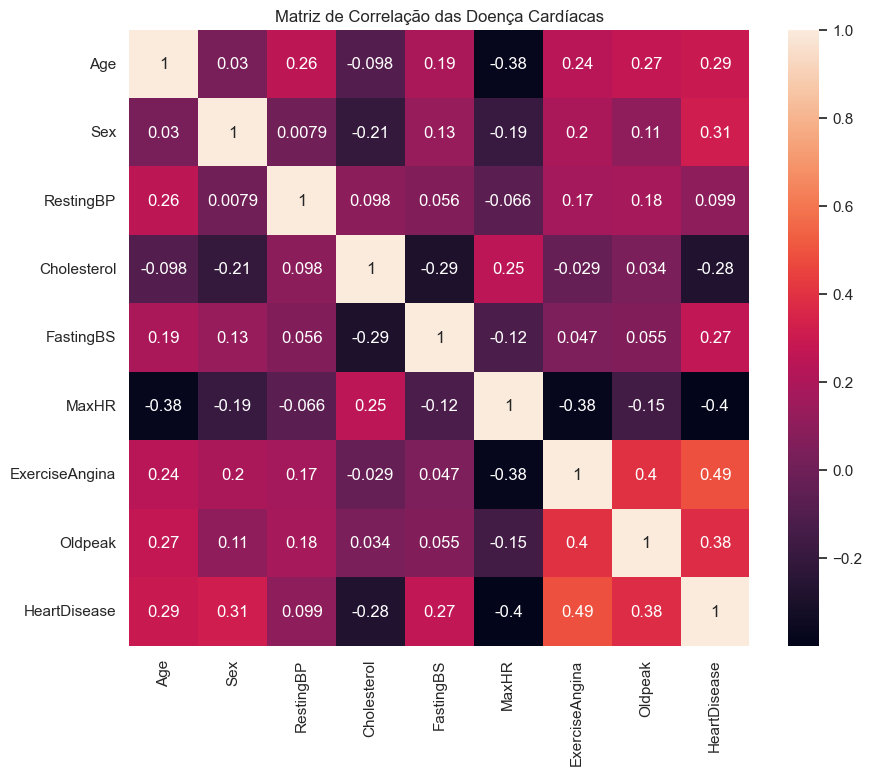

In [ ]:
# Matriz de Correlação:

# Criando a Matriz:
matriz_corr = data_train[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',\
                          'HeartDisease']].corr(method = 'pearson')
display(matriz_corr)

# Plotando o resultado:

plt.figure(figsize = (10,8))
sns.heatmap(matriz_corr, annot = True)
plt.title('Matriz de Correlação das Doença Cardíacas')
plt.show()

Notamos que apesar de não serem correlações muito altas, as variáveis **ExerciseAngina** e **Oldpeak** possuem bons valores, assim como a correlação negativa da variável **MaxHR**.

Além disso, chama a atenção que **Cholesterol** tenha uma correlação negativa com as doença cardíacas.

## Gráficos - Variáveis Numéricas:


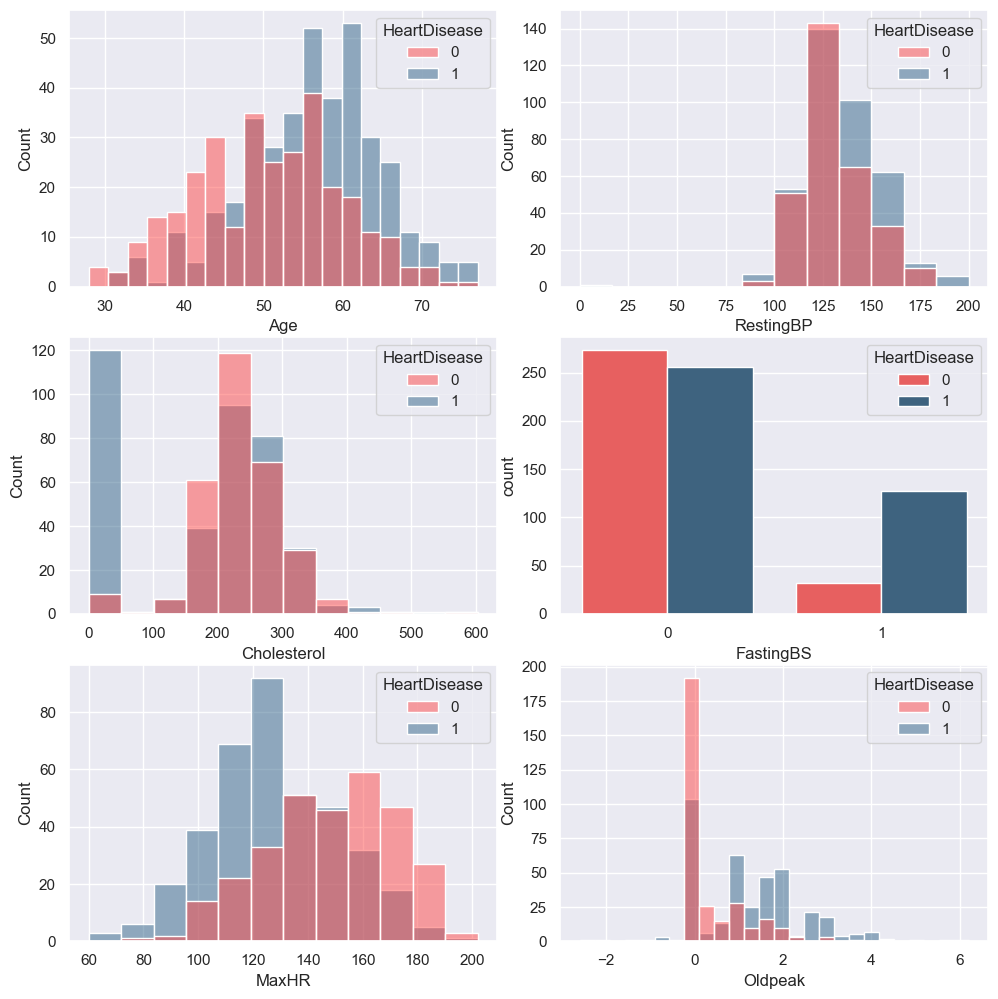

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (10,10))
plt.tight_layout()
age_hist = sns.histplot(x = 'Age', hue = 'HeartDisease',palette = ['#FE4A49','#33658A'], data = data_train, bins = 20, ax=axes[0,0])
resting_hist = sns.histplot(x = 'RestingBP', hue='HeartDisease',palette = ['#FE4A49','#33658A'], data=data_train, bins = 12, ax=axes[0,1] )
cholesterol_hist = sns.histplot(x = 'Cholesterol', palette = ['#FE4A49','#33658A'],hue = 'HeartDisease', data=data_train, bins = 12, ax=axes[1,0])
fasting_count = sns.countplot(x = 'FastingBS', hue= 'HeartDisease', palette = ['#FE4A49','#33658A'],data=data_train, ax=axes[1,1])
maxhr_hist = sns.histplot(x = 'MaxHR', hue = 'HeartDisease',palette = ['#FE4A49','#33658A'], data=data_train, bins = 12, ax=axes[2,0])
oldpeak_hist = sns.histplot(x = 'Oldpeak', hue='HeartDisease', palette = ['#FE4A49','#33658A'],data=data_train, ax=axes[2,1])

Algumas considerações que podemos fazer com base nos gráficos:

* Na característica **Age (idade)**, podemos perceber que o número de doenças cardíacas é a maior conforme a idade avança. De forma análoga, podemos notar esse comportamento na característica **Oldpeak**.
* Enquanto o **FastingBS (Nível de açucar no sangue)** está dentro do aceitável, não há diferença aparente entre a presença de doença cardíaca ou não. Porém, para os indivíduos que possuem o nível acima do recomendado, nota-se uma presença significativamente maior de doenças cardíacas.
* Já, a caracterísitca **MaxHR (Frequência cardíaca máxima registrada)** apresenta um, para as frequências cardíacas mais baixas, )um presença maior de doenças cardíacas.

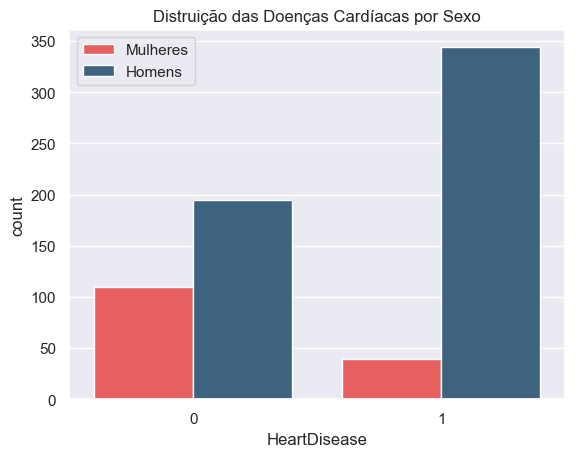

Porcentagem de pacientes com doença cardíacas: 55.67 %.


In [ ]:
# Gráfico do HeartDisease em comparação ao sexo:

heart_count = sns.countplot(x = 'HeartDisease', palette = ['#FE4A49','#33658A'], data=data_train, hue = 'Sex')
heart_count.set_title('Distruição das Doenças Cardíacas por Sexo')
heart_count.legend(('Mulheres','Homens'))
plt.show()
print(f'Porcentagem de pacientes com doença cardíacas: {round(y_train.value_counts(normalize=True)[1]*100,2)} %.')

In [ ]:
grouped_data = data_train.groupby('HeartDisease').agg({
                                    'Sex':'mean',
                                    'Age':['min','mean','max'],
                                    'RestingBP':'mean',
                                    'Cholesterol':'mean',
                                    'Oldpeak':'mean',
                                    'FastingBS':'sum',
                                    'ExerciseAngina':'sum'})
grouped_data.columns = ['% de Homens', 'Idade Mínima', 'Média das Idades','Idade Máxima','Pressão Arterial Média',\
                       'Colesterol Médio','Oldpeak Médio', 'Nível de Açucar Médio', 'Angina induzida por exercício']
grouped_data.T

HeartDisease,0,1
% de Homens,0.64,0.90
Idade Mínima,28.00,31.00
Média das Idades,50.55,56.02
Idade Máxima,75.00,77.00
Pressão Arterial Média,129.99,133.69
Colesterol Médio,232.23,171.20
Oldpeak Médio,0.41,1.24
Nível de Açucar Médio,32.00,127.00
Angina induzida por exercício,41.00,237.00


## Gráficos - Variáveis Categóricas:

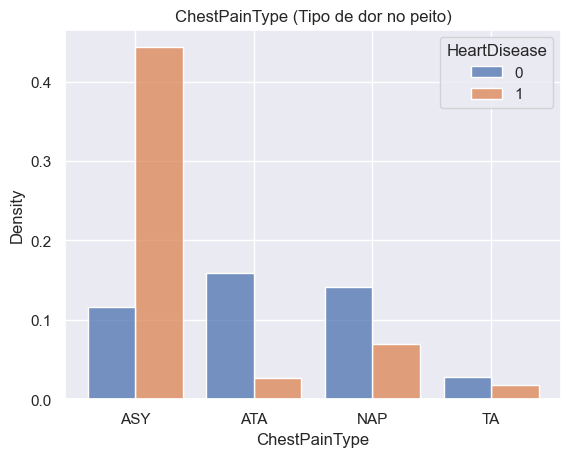

In [ ]:
chest_count = sns.histplot(x = 'ChestPainType', data=data_train, stat = 'density', shrink = 0.8,multiple = 'dodge', hue = 'HeartDisease')
plt.title('ChestPainType (Tipo de dor no peito)')
plt.show()

Aqui podemos perceber que os casos **ASY (Asintomático)** requerem umas atenção especial pode apresentaram uma diferença significativa nos casos de doença cardíaca, assim como **ATA (Angina Atípica)** para o caso negativo de doenças cardíacas.

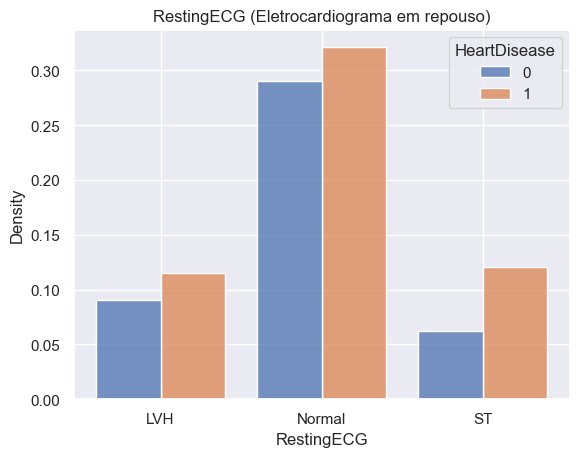

In [ ]:
chest_count = sns.histplot(x = 'RestingECG', data=data_train, stat = 'density', shrink = 0.8,multiple = 'dodge', hue = 'HeartDisease')
plt.title('RestingECG (Eletrocardiograma em repouso)')
plt.show()

O gráfico da característica **RestingECG** parece bem equilibrado, já é esperado um número maior para os casos positivos de doença cardíaca por representarem 55% dos pacientes.

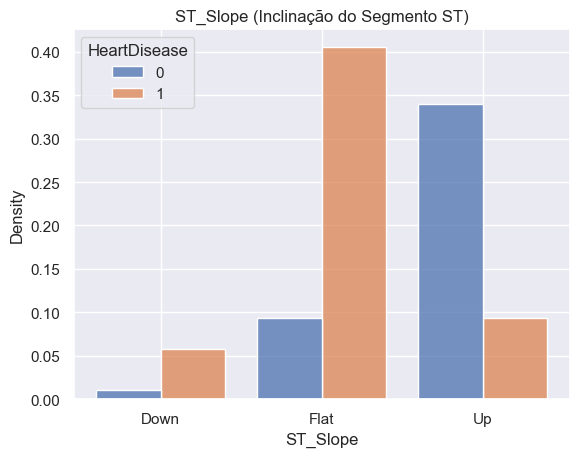

In [ ]:
chest_count = sns.histplot(x = 'ST_Slope', data=data_train, stat = 'density', shrink = 0.8,multiple = 'dodge', hue = 'HeartDisease')
plt.title('ST_Slope (Inclinação do Segmento ST)')
plt.show()

No **ST_Slope**, podemos perceber um certo desbalanceamento entre os casos de doença cardíaca nas classes **Flat**, **Down** para o caso positivo enquanto a classe **Up** é predominante os casos negativos para doença cardíaca.

[]

<Figure size 2000x1500 with 0 Axes>

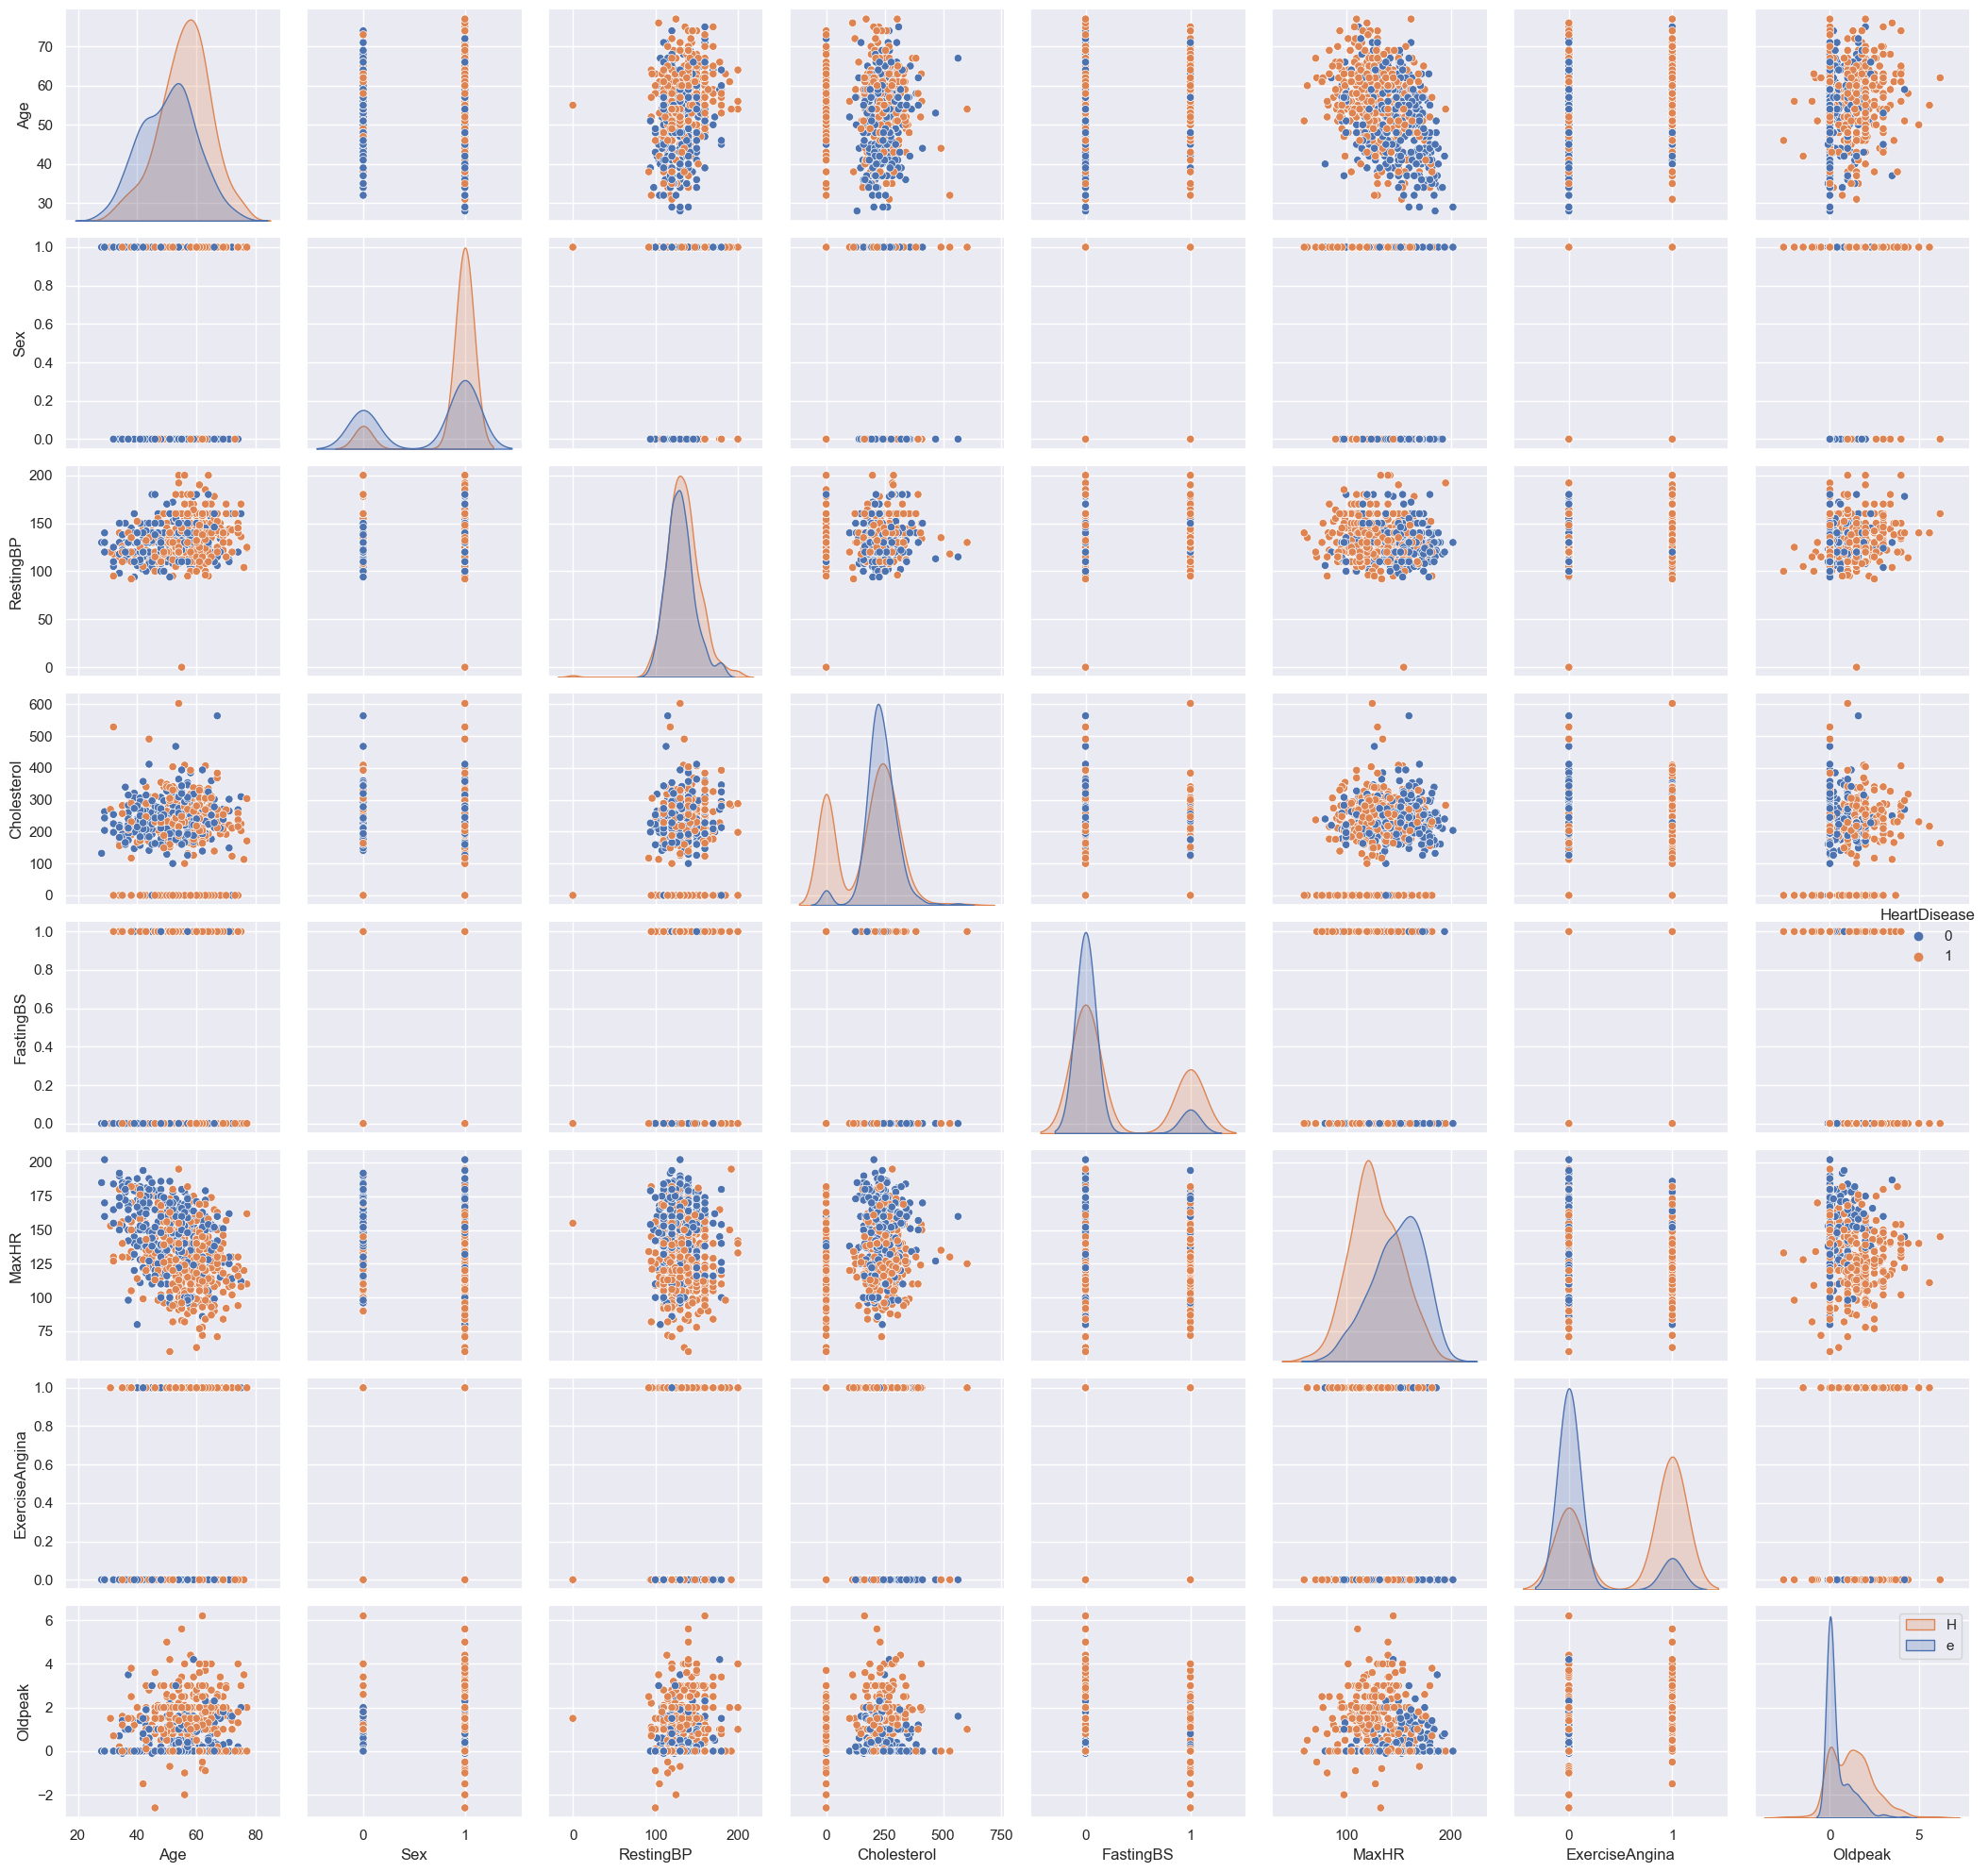

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(data_train, hue='HeartDisease')
plt.legend('HeartDisease')
plt.tight_layout()
plt.plot()

# Preprocessamento dos Dados:

Nesta etapa do projeto, ocorrem alguns ajustes nos dados para que se adaptem melhor ao modelo de Machine Learning. As principais etapas são:

* **Tratamento dos valores ausentes:** Onde devemos verificar se existem valores ausentes e como contornar esse problema, seja por qual tipo de imputação ou exclusão.


* **Feature Scaling:** Os modelos que não são baseados em árvore requerem que os dados estejam numa mesma escala para que uma característica não se "sobreponha" a outra. Existem duas técnicas principais de feature scaling, a *normalization* e *standardization*. No nosso caso, não será precisa trabalhar com nenhuma delas pois os modelos de DecisionTree e RandomForest não são algoritmos baseados em distância, sendo assim, essa etapa não estará presente no nosso projeto.


* **Feature Encoder** Como os algoritmos trabalham, em geral, com números, é importante uma transformação das variáveis categóricas através do *One Hot Encoder*, *Label Encoder* e entre outros. No nosso caso, usaremos o **Target Encoder**, onde basicamente trocamos a classe da variável pela média da variável alvo para aquela classe. Por exemplo, imagine a variável categórica *RestingECG* onde uma das classes é *Normal*, sendo assim, trocamos *Normal* pela média da variável *HeartDisease* para todos os pacientes que possuem *Normal* em *RestingECG*.

In [ ]:
# Relembrando: Vamos utilizar os dados que já separados anteriormente pelo train_test_split:

print(f'Dataset de Treino (X_train) com dimensões {X_train.shape}.')
print(f'Dataset de Test (X_test) com dimensões {X_test.shape}.')
print(f'Target de Treino (y_train) com dimensões {y_train.shape}.')
print(f'Target de Test (y_test) com dimensões {y_test.shape}.')

Dataset de Treino (X_train) com dimensões (688, 11).
Dataset de Test (X_test) com dimensões (230, 11).
Target de Treino (y_train) com dimensões (688,).
Target de Test (y_test) com dimensões (230,).


In [ ]:
# Checagem de dados faltantes:

X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

Sendo assim, não será necessário trabalhar com as técnicas para tratar valores ausentes. E, como mencionado anteriormente, não será necessário fazer o **feature scaling** . Então faremos apenas a utilização do **Target Encoder** nas variáveis **ChestPainType**, **RestingECG** e **ST_Slope**.

### Target Encoder

In [ ]:
# Importando o Target Encoder
import category_encoders as ce

# Instanciando o Target Encoder
target_encoder = ce.TargetEncoder()

# Fazendo um cópia dos dados:
X_train_encoded = X_train.copy

X_train_encoded = target_encoder.fit_transform(X_train[['ChestPainType','RestingECG','ST_Slope']], y_train)

X_train_preproc = X_train_encoded.join(X_train.drop(['ChestPainType','RestingECG','ST_Slope'], axis = 1))
X_train_preproc

,ChestPainType,RestingECG,ST_Slope,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
648,0.79,0.56,0.83,59,1,170,326,0,140,1,3.40
663,0.14,0.52,0.81,66,1,160,246,0,120,1,0.00
469,0.14,0.52,0.81,56,1,124,224,1,161,0,2.00
368,0.79,0.52,0.81,57,1,140,0,0,120,1,2.00
25,0.33,0.52,0.21,36,1,130,209,0,178,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
401,0.79,0.66,0.81,51,1,130,0,1,163,0,0.00
343,0.79,0.52,0.81,52,1,130,0,1,120,0,0.00
192,0.14,0.52,0.21,48,1,130,245,0,160,0,0.00
899,0.79,0.52,0.21,61,1,148,203,0,161,0,0.00



# Modelos de Machine Learning

Nessa etapa do projeto faremos, de fato, as previsões para as doenças cardíacas com base nos dados do nosso dataset. Resgataremos os dados "não vistos" de teste para fazer essa previsão. Mas, antes disso, precisando passar por algumas etapas de estanciamento do modelo e de treinamento.

Estudaremos dois algoritmos de Machine Learning:

* **Decision Tree Classifier**

* **Random Forest Classifier**

Além disso, usaremos uma validação cruzada para entrar melhores parâmetros para o modelo. Ao final, faremos uma avaliação do modelo com algumas métricas, em especial a ROC Curve e a AUC ROC.



## Cross Validation ou Validação Cruzada:

A **Cross Validation** é uma técnica de treinamento do modelo subdivindo os dados de treino antes de utilizarmos os dados de teste. Funciona da seguinte forma: determinamos uma quantidade de *folds* que será a quantidade de partes que os nossos dados de treino serão divididos. Para cada *fold* teremos dados de treino e de teste, mitigando a aleatoriedade da divisão. E para cada um desses folds o nosso algoritmo irá treinar e testar separadamente. Após esse processo, podemos obter a média do desempenho obtido em cada fold para as métricas desejadas e, obtendo assim uma estimativa melhor do desempenho do modelo.
<img src='https://es.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1676051591395.jpg' alt = 'TESTE' width = '700' height = '350' title = "Image by rawpixel.com on Freepik">

Além disso, podemos utilizar a **validação cruzada** para testar diferentes parâmetros do nosso algoritmo. No caso atual, vamos usar validação cruzada para com o **GridSearch** testando o parâmetro **max_depth** da **Decision Tree Classifier**. Posteriormente, no caso do **RandomForestClassifier**, testaremos os parâmetros **max_depth** e **n_estimators**.

In [ ]:
# Importando o Grid Search para a Cross Validation:

from sklearn.model_selection import GridSearchCV

# Instanciando o Decision Tree Classifier

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_preproc, y_train)

DecisionTreeClassifier()

In [ ]:
# Iremos testar o parâmetro max_depth
params = {'max_depth':[2,4,6,8,10]}
cv = GridSearchCV(dt,param_grid = params, scoring = 'roc_auc', n_jobs = None, refit = True,
                 cv = 4, verbose = 1, pre_dispatch = None, error_score = np.nan, return_train_score = True)

cv.fit(X_train_preproc, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, pre_dispatch=None,
             return_train_score=True, scoring='roc_auc', verbose=1)

### Analisando os Resultados da Validação Cruzada:

In [ ]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.00,0.00,0.00,0.00,2,{'max_depth': 2},0.88,0.83,0.84,0.86,0.85,0.02,2,0.87,0.88,0.87,0.87,0.87,0.00
1,0.00,0.00,0.00,0.00,4,{'max_depth': 4},0.91,0.90,0.88,0.89,0.89,0.01,1,0.93,0.94,0.95,0.94,0.94,0.01
2,0.00,0.00,0.00,0.00,6,{'max_depth': 6},0.85,0.80,0.84,0.87,0.84,0.03,3,0.97,0.98,0.99,0.98,0.98,0.01
3,0.00,0.00,0.00,0.00,8,{'max_depth': 8},0.78,0.79,0.78,0.78,0.78,0.01,5,1.00,1.00,1.00,0.99,1.00,0.00
4,0.00,0.00,0.00,0.00,10,{'max_depth': 10},0.80,0.78,0.78,0.80,0.79,0.01,4,1.00,1.00,1.00,1.00,1.00,0.00


Text(0, 0.5, 'ROC AUC')

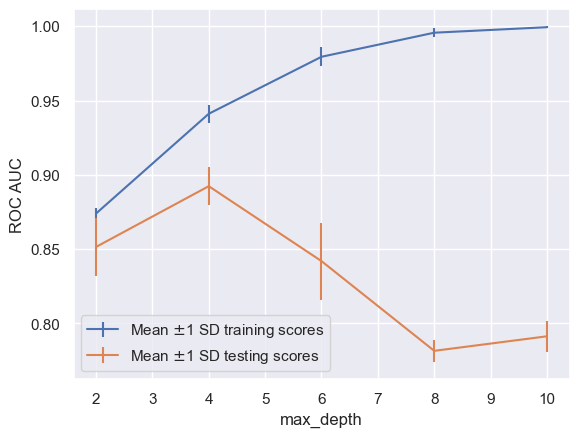

In [ ]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
           cv_results_df['mean_train_score'],
           yerr = cv_results_df['std_train_score'],
            label = 'Mean $\pm$1 SD training scores')

ax.errorbar(cv_results_df['param_max_depth'],
           cv_results_df['mean_test_score'],
           yerr = cv_results_df['std_test_score'],
            label = 'Mean $\pm$1 SD testing scores')

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

Através do **cv_results** podemos obter os resultados da validação cruzado, onde temos a performance de cada fold para cada um dos valores do parâmetro testado. Sendo assim, uma maneira geral de capturar o resultado é utilizar a performance média dos folds em relação ao parâmetro e verificar qual parâmetro se saiu melhor. Através dos resultados, temos:

* A linha laranja, representando os dados de teste, obteve maior valor quando **max_depth = 4**.
* Nem sempre maior profundidade da árvore (maior quantidade de 'nós') vai representar maior performance.
* A linha azul sempre evolui já que ela está se adequanto a dados repetidos com o passar dos treinos.
* Talvez pudesse analisar os casos de **max_depth** em 3 e 5 que não foram testados. Isso ficará a cargo do leitor, prosseguiremos com o valor de **max_depth = 4**.

Agora que usamos a validação cruzada para obter o melhor parâmetro **max_depth**, podemos utilizar todos os nossos dados de treino para treinar a **Árvore de Decisão** e usar os dados de test para encontrar a performance real do modelo. Sendo assim, é nesse momento que, pela primeira vez, usaremos dos os dados do problema.
</br>
</br>

# Decision Tree

<img src='https://img.freepik.com/free-vector/hand-drawing-illustration-development-concept_53876-15490.jpg?w=740&t=st=1687445140~exp=1687445740~hmac=bd681a7c93241a1974cdbd021dab1d4f703f8e1f854272a6576ec8565e6ecf1f' alt = 'TESTE' width = '500' height = '500' title = "Image by rawpixel.com on Freepik">

A **Árvore de Decisão ou Decision Tree** é um algorítmo de machine learning que é amplamento utilizado para problemas de classificação e regressão. A **Decision Tree** é um modelo bastante intuitivo já que funciona como um fluxo de decisões lógicas que chamamos de 'nós' até atingir uma certa profundidade e encontrar um 'nó-folha' que atribui uma classe final para objeto na característica alvo. O funcionamento básico de uma Árvore de Decisão é: É escolhida uma variável independente que melhor separa os dados quanto a variável alvo, a isso chamamos de primeiro nó.

Agora as subdivisões feitas anteriormente terão uma nova característica escolhida a fim de melhor subdividi-las novamente. O processo é repetido diversas vezes até atingir uma critério de parada que pode ser a quantidade de nós, profundidade da árvore e etc. Ao atingir o último nó (nó-folha), todos os elementos que percorrem aquele caminho através das decisões lógicas terão a característica alvo atribuída pela sua maioria ou ajustado pelo parâmetro de decisão do modelo.

In [ ]:
# Instanciando a Árvore de Decisão:

dt = tree.DecisionTreeClassifier(max_depth = 4)

# Aplicar Target Encoder nos dados de Test:
X_test_encoded = target_encoder.transform(X_test[['ChestPainType','RestingECG','ST_Slope']])
X_test_preproc = X_test_encoded.join(X_test.drop(['ChestPainType','RestingECG','ST_Slope'], axis = 1))

# Treinando o modelo:

dt.fit(X_train_preproc, y_train)

# Predict nos dados de teste:

y_pred_tree = dt.predict(X_test_preproc)

## Resultados da Decision Tree:

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       105
           1       0.83      0.89      0.86       125

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.84       230
weighted avg       0.84      0.84      0.84       230

O AUC ROC do modelo é de: 83.45.


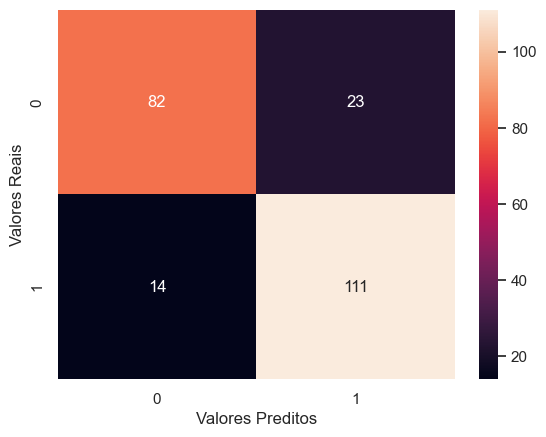

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred_tree))
print(f'O AUC ROC do modelo é de: {round(roc_auc_score(y_test, y_pred_tree)*100,2)}.')
cf_matrix = confusion_matrix(y_test,y_pred_tree)
sns.heatmap(cf_matrix, annot = True, fmt = 'd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

Alguns detalhes sobre o resultado:

* Dos 230 pacientes, tivemos uma **Acurácia de 84%**, ou seja, entre os doentes e não-doentes, conseguimos acertar o valor real de 84%.


* Tivemos uma **Precisão de 83%**, ou seja, 83% do que previmos como doentes estão realmente doente.


* Resultamos em um **Recall de 89%**, significando que identificamos 89% dos doentes reais.


* Além disso, a **AUC ROC** do modelo é de 83,45.

## Visualização da Árvore de Decisão:

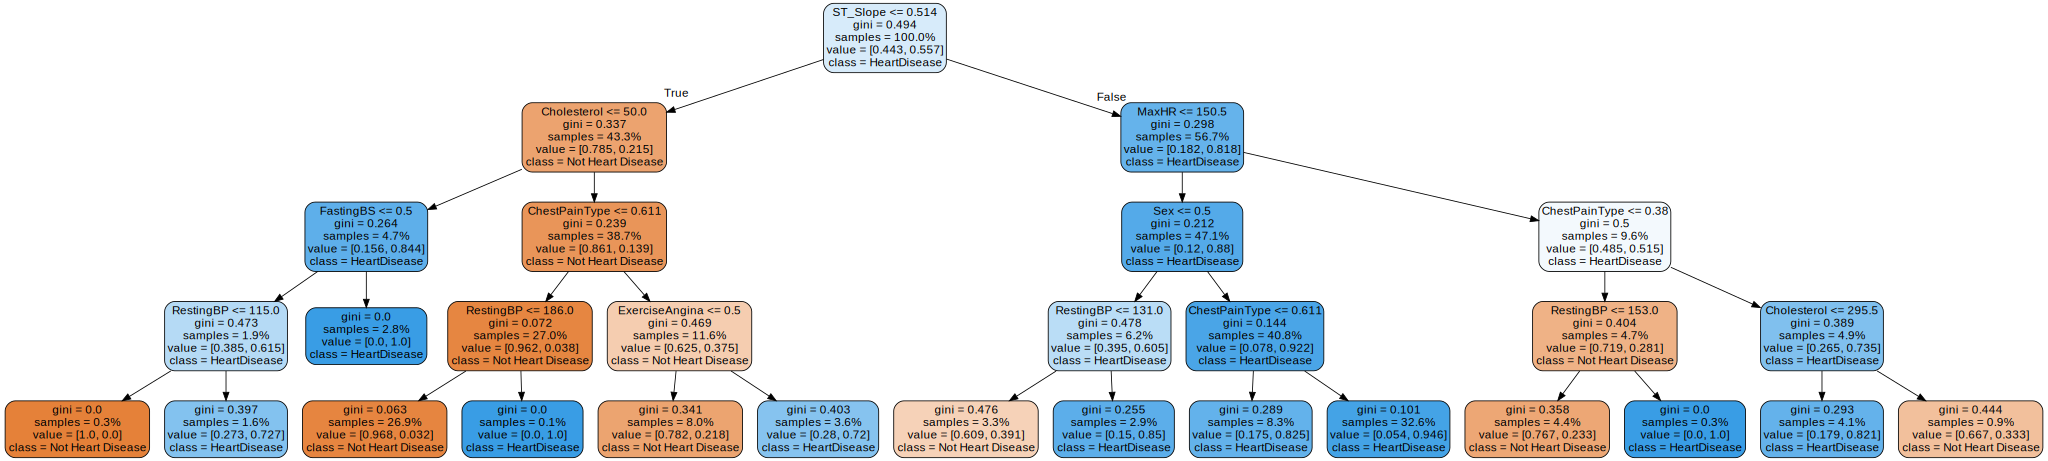

In [ ]:
# Exportar Árvore para Visualizar com o GraphViz:

dot_tree = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names = X_train_preproc.columns.tolist(),
                                proportion=True, class_names=['Not Heart Disease', 'HeartDisease'])

graph_tree = graphviz.Source(dot_tree)

graph_tree

</br>
</br>
</br>

# Random Forest:

<img src='https://img.freepik.com/free-vector/seamless-pattern-green-trees-with-animals-illustration-set_1284-41515.jpg?w=740&t=st=1687446760~exp=1687447360~hmac=fb98199458f070ec263a6469167ab0a4843c210c997216852340b510607b931d' alt = 'TESTE' width = '500' height = '500' title = "Image by macrovector on Freepik">

O algoritmo de aprendizado de máquina **Random Forest ou Floresta Aleatória** é um dos métodos ensemble. Assim como a Decision Tree, também pode ser utilizado para problemas de Classificação ou de Regressão. Basicamente, o algoritmo **Random Forest** combina várias **Decision Trees** individuais formando uma 'floresta', onde cada árvore é treinada individualmente. Uma vez que todas as árvores são treinadas, o algoritmo combina as previsões para chegar a um resultado final através de uma "votação majoritária" nos casos de Classificação.

Dessa forma, o **Random Forest** se caracteriza por método ensemble, que são os métodos que combinam várias técnicas (neste caso, várias árvores de decisão) de machine learning para obter resultados mais precisos e robustos.


In [ ]:
# Importando a Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instanciando o modelo:
rf = RandomForestClassifier( n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=4, verbose=0,
                            warm_start=False, class_weight=None)

## Cross Validation

No caso da Random Forest, iremos utilizar dois parametros para encontrar os melhores valores: **max_depth** que determina a profundidade da árvore e o parâmetro **n_estimators** que determina a quantidade de árvores utilizadas.

In [ ]:
# Criando um dicionários com os parâmetros a serem testados:

dict = dict({'max_depth':[4,5,6,8], 'n_estimators':[10,50,100,200]})
dict

{'max_depth': [4, 5, 6, 8], 'n_estimators': [10, 50, 100, 200]}

In [ ]:
# Instanciando a Cross Validation e passando o dicionário criado como 'param_grid':

cv_rf = GridSearchCV(rf, param_grid = dict, scoring = 'roc_auc', n_jobs = None,
                       refit = True, cv = 4, verbose = 1, pre_dispatch = None, error_score = np.nan,
                       return_train_score = True)

# Treinando a Validação Cruzada:
cv_rf.fit(X_train_preproc,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'max_depth': [4, 5, 6, 8],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

### Visualizando os melhores parâmetros da Validação Cruzada:

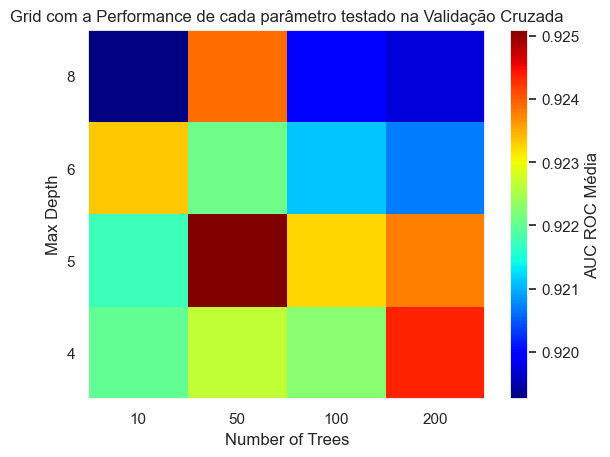

Os melhores parâmetros para a Random Forest são: {'max_depth': 5, 'n_estimators': 50}.


In [ ]:
cv_rf_results = pd.DataFrame(cv_rf.cv_results_)
mean_test_score_grid = np.array(cv_rf_results['mean_test_score']).reshape(4,4)
x_grid, y_grid = np.meshgrid(range(5), range(5))
ax = plt.axes()
grid_results = ax.pcolormesh(x_grid, y_grid, mean_test_score_grid, cmap = plt.cm.jet)
plt.colorbar(grid_results, label = 'AUC ROC Média')
ax.set_xticks([0.5,1.5,2.5,3.5])
ax.set_yticks([0.5,1.5,2.5,3.5])
ax.set_xticklabels([str(x) for x in dict['n_estimators']])
ax.set_yticklabels([str(y) for y in dict['max_depth']])
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Max Depth')
ax.set_title('Grid com a Performance de cada parâmetro testado na Validação Cruzada')
plt.show()
print(f'Os melhores parâmetros para a Random Forest são: {cv_rf.best_params_}.')

## Aplicando a Random Forest:

In [ ]:
# Instanciando a Random Forest com n_estimators = 50 e max_depth = 5:
rf = RandomForestClassifier( n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=4, verbose=0,
                            warm_start=False, class_weight=None)

# Treinando com todos os dados de treino:

rf.fit(X_train_preproc, y_train)

# Prevendo os valores da variável alvo:

y_pred_rf = rf.predict(X_test_preproc)

## Visualizando os resultados da Random Forest:

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.84      0.91      0.88       125

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

O AUC ROC do modelo é de: 85.6.


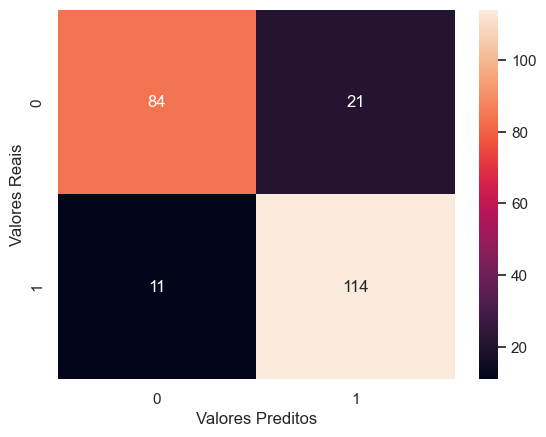

In [ ]:
print(classification_report(y_test, y_pred_rf))
print(f'O AUC ROC do modelo é de: {round(roc_auc_score(y_test, y_pred_rf)*100,2)}.')
cf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cf_matrix_rf, annot = True, fmt = 'd')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

Com o **Random Forest** tivemos um pequeno ganho de performance:

* A **Acurácia** subiu de 84% para **86%**.


* A **Precisão** passou de 83% para **84%**.


* E o **Recall** subiu de 89% para **91%**.


* A **AUC ROC** subiu 2% chegando em **85.6%**.

## Grau de Importância das Variáveis segundo a Validação Cruzada:

In [ ]:
feat_imp_df = pd.DataFrame({
    'Feature name':X_train_preproc.columns.tolist(),
    'Importance':cv_rf.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending = False)

,Feature name,Importance
2,ST_Slope,0.30
0,ChestPainType,0.16
6,Cholesterol,0.10
10,Oldpeak,0.10
8,MaxHR,0.09
9,ExerciseAngina,0.09
3,Age,0.05
4,Sex,0.04
5,RestingBP,0.03
7,FastingBS,0.03


</br>


# Conclusão:
<img src='https://img.freepik.com/free-vector/goal-achievement-planning-checklist-flat-composition-with-man-holding-pencil-tick-image_1284-63673.jpg?w=740&t=st=1687448042~exp=1687448642~hmac=3ff4ab6f345048682eeb807649209fe2ca66f586af739ab38316fe0fb6a07cb9
' alt = 'TESTE' width = '300' height = '300' title = "Image by macrovector on Freepik">
</br>
Durante o desenvolvimento do projeto, aplicamos técnicas assenciais, como limpeza de dados, featuring scaling, além de um análise exploratória trazendo algumas medidas estatísticas e gráficos que nos fornecerem alguns insights sobre os dados. Podemos perceber que o problema de doença cardíaca, nos nossos dados, incide mais sobre os homens, além da dor no peito e colesterol serem bons indicativos e que devem ser monitorados permanentemente.

Na parte final do projeto, aplicamos dois algorítmos de aprendizado de máquina, a **Árvore de Decisão** ou *Decision Tree* e a **Floresta Aleatória** ou *Random Forest* que é um modelo ensemble onde, basicamente, reproduzir várias árvores de decisões. Ambos os modelos tiveram performance parecidas, com uma leve vantagem para o **Random Forest**, como já era esperado. Conseguimos atingir um **acurácia** de 86%, que representa uma performance geral do modelo. Uma **precisão** de 84%, que representa que o nosso modelo tem uma boa performance quando rotula positivamente. Além disso, tivemos um **Recall** de 91% que é uma métrica bastante importante na decteção de doenças pois ele representa a porcentagem dos doentes que o modelo conseguiu captar e indentificar dessa forma.

Vale destacar que esse é um projeto de estudos pessoal, faz parte da minha construção de porftólio visando uma vaga como Cientista de Dados Júnior. Como todo projeto, surgem sempre oportunidades de aprimoramentos adicionais, consideração de outros algoritmos de classificação como Suport Vector Machines, Naive Bayes, Regressão Logística. Além disso, um projeto de engenharia de características para dar mais profundidade as características relevantes do problema e um melhor desempenho para o modelo.

Finalizo o projeto com o desejo de buscar novas possibilidades e soluções para o projeto numa próxima atualização. É longa a jornada estudos de machine learning mas creio que o projeto atual tenha desenvolvido um papel importante no meu crescimento na área.